#importing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#load data

In [ ]:
#credit card data is sensitive hence PCA is used to convert its form.
#0-> legit transaction
#1-> fraud transaction
credit_card_data=pd.read_csv('/content/creditcard.csv (1).zip')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#Distribution of legit transaction and fraudulent transaction
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


#dataset is highly unbalanced
#0--> normal transaction
#1--> fraudulent transaction

In [ ]:
#separating the data for analysis
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measure of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
#compare the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#under-sampling
Building a sample dataset with similar distribution of normal and fraud transactions.

*  number of fraud transactions--> 492





In [ ]:
legit_sample=legit.sample(n=492)

#concatenating two dataframe

In [ ]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54369,46417.0,-1.567139,2.211532,0.268614,2.469820,-0.431918,0.631341,-0.743096,1.538690,-1.783223,0.610097,-0.488694,-0.395105,-0.961515,1.548845,0.718504,0.960883,-0.123320,1.041962,1.582184,-0.132818,-0.074296,-0.730109,0.037587,-0.923986,-0.286030,0.000920,-0.280959,-0.022383,0.76,0
209745,137688.0,1.801796,0.094108,0.072842,3.681250,-0.092276,0.986697,-0.714837,0.417429,-0.393732,1.561037,0.155369,-0.136534,-1.145829,0.174725,-1.104043,1.358553,-1.040186,0.619107,-1.519923,-0.298501,0.254119,0.705813,0.191982,0.656692,-0.250900,0.025720,-0.002383,-0.036816,17.76,0
78896,57758.0,1.198559,-0.020942,0.269723,-0.019025,-0.479558,-0.929985,0.071276,-0.190032,0.099499,-0.237799,0.325480,0.548341,0.320849,0.280856,1.228623,-0.268829,0.124422,-1.074745,-0.418242,-0.046337,0.038776,0.145048,0.011346,0.501875,0.272409,1.076544,-0.077897,0.003133,26.50,0
122384,76541.0,1.152290,0.032415,1.303180,1.334627,-0.901894,-0.178586,-0.498434,0.039972,0.755613,-0.228426,-0.636650,0.959591,0.930829,-0.538087,0.079949,0.035800,-0.299172,-0.172635,-0.217835,-0.075252,-0.051698,0.099892,-0.015475,0.420617,0.445063,-0.412338,0.078222,0.040379,9.99,0
104980,69315.0,1.214801,-0.644083,0.299559,-0.527778,-1.173792,-1.404196,-0.155688,-0.300562,-0.963905,0.591217,0.095331,-0.664383,-0.425054,0.166022,0.695995,1.014992,0.457504,-1.946905,0.636661,0.214651,-0.212930,-1.019475,0.175313,0.663297,0.101415,-0.671815,-0.028925,0.038227,105.85,0


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()
#nature of dataset didnot changed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93052.105691,-0.021077,0.101084,0.012840,-0.073031,-0.041700,0.026166,-0.027882,0.022695,0.077261,0.025179,0.057701,-0.041368,-0.019248,0.028501,0.034868,0.000410,0.050400,0.065248,0.007523,-0.044606,0.026503,0.052159,0.000179,-0.001822,0.031045,-0.010224,-0.044232,-0.014295,71.111077
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#splitting data into features and targets

In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
54369    46417.0 -1.567139  2.211532  ... -0.280959 -0.022383    0.76
209745  137688.0  1.801796  0.094108  ... -0.002383 -0.036816   17.76
78896    57758.0  1.198559 -0.020942  ... -0.077897  0.003133   26.50
122384   76541.0  1.152290  0.032415  ...  0.078222  0.040379    9.99
104980   69315.0  1.214801 -0.644083  ... -0.028925  0.038227  105.85
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]


In [ ]:
print(Y)

54369     0
209745    0
78896     0
122384    0
104980    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


#split the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


#model training by using logistic regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training training data with logistic regression
model.fit(X_train,Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#model evaluation

-accuracy score



In [ ]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9428208386277002


In [ ]:
#accuracy on testing data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('accuracy on testing data:',testing_data_accuracy)

accuracy on testing data: 0.9137055837563451


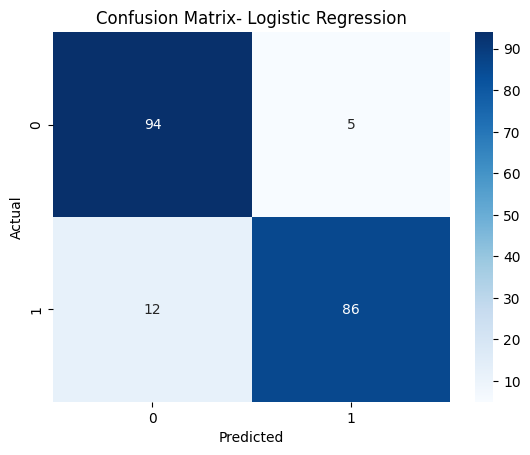

In [ ]:
# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix- Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#model training by using Random Forest

Accuracy: 0.9187817258883249
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.86      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



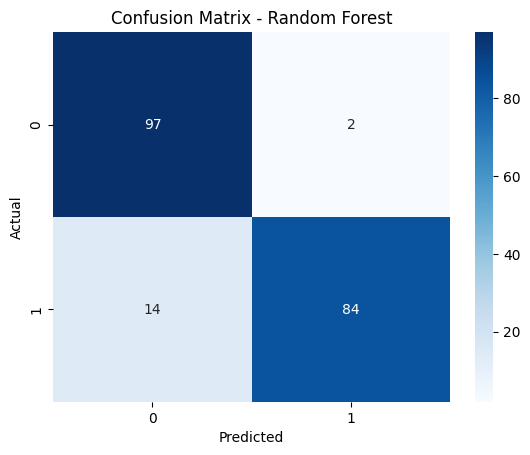

In [ ]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Accuracy and classification report
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



#Model Training by XGboost

In [ ]:
#import
from xgboost import XGBClassifier

In [ ]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9035532994923858
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        99
           1       0.94      0.86      0.90        98

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



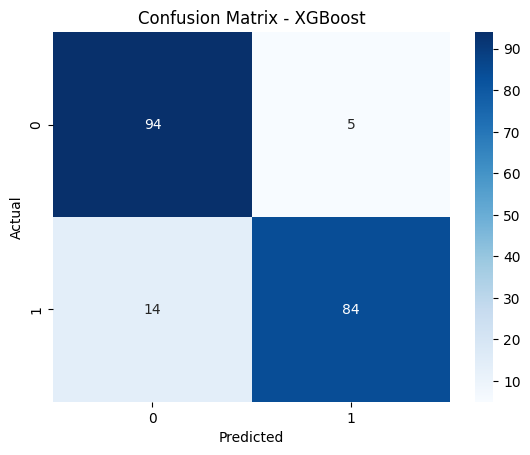

In [ ]:
# Accuracy and classification report
print("XGBoost Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
